# EDA on the stock Quantities
1. Initial Quantity
2. Available Quantity
3. Sold Quantity

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils import *

X_dataframe = pd.read_csv("../data/X_dataframe.csv")

# Initial Quantity

In [2]:
X_dataframe["initial_quantity"].describe()

count    90000.000000
mean        34.957178
std        421.091981
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       9999.000000
Name: initial_quantity, dtype: float64

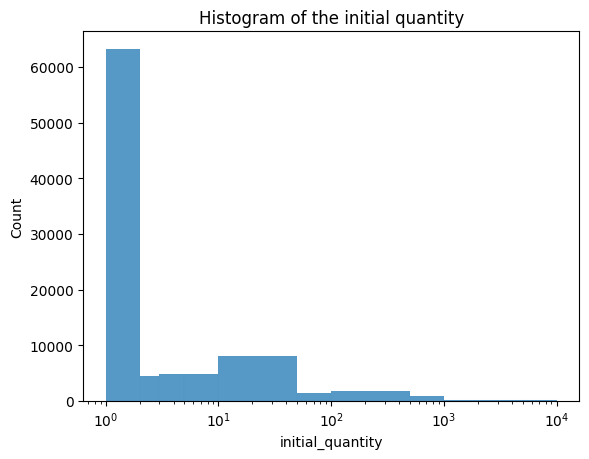

In [3]:
sns.histplot(X_dataframe["initial_quantity"], bins = [0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000])
plt.title("Histogram of the initial quantity")
plt.xscale("log")
plt.show()


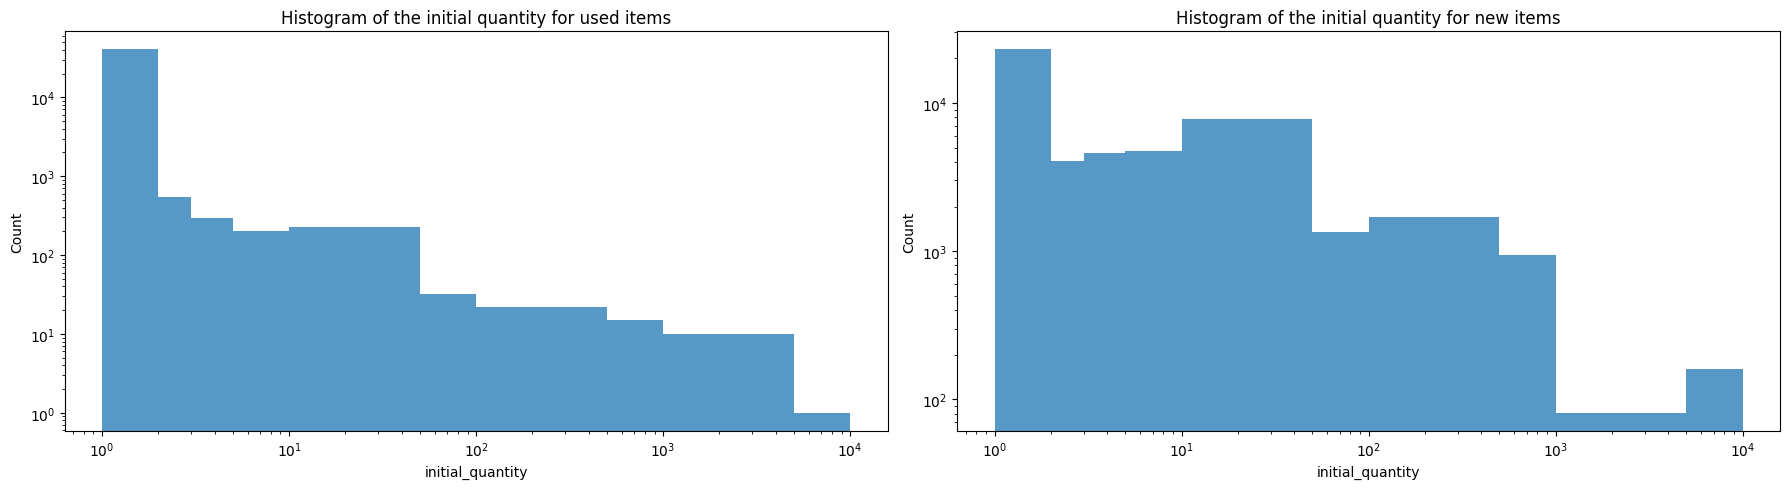

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 1]["initial_quantity"], ax=ax[0], bins = [0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000])
ax[0].set_title("Histogram of the initial quantity for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["initial_quantity"], ax=ax[1], bins = [0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000])
ax[1].set_title("Histogram of the initial quantity for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
plt.tight_layout()
plt.show()

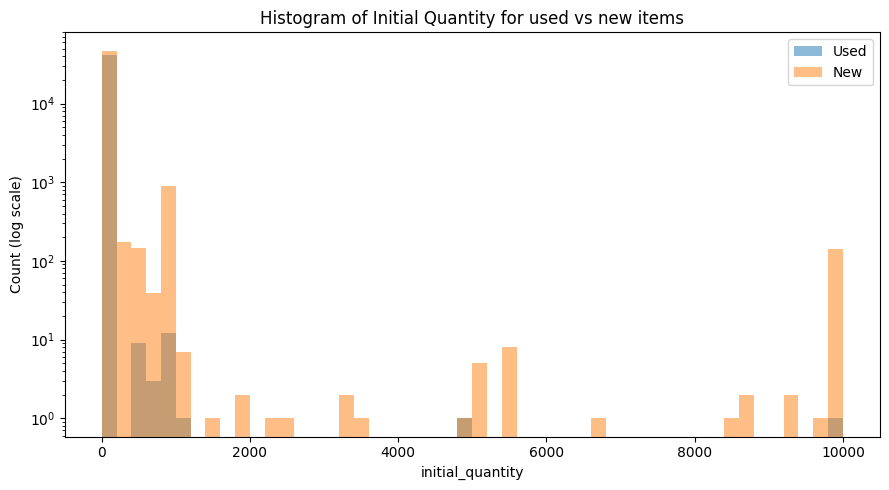

In [5]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 1, "initial_quantity"],
    bins=50,
    alpha=0.5,  # transparency
    label="Used",
    color="tab:blue",
)

# New items
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 0, "initial_quantity"],
    bins=50,
    alpha=0.5,
    label="New",
    color="tab:orange",
)

ax.set_yscale("log")
ax.set_title("Histogram of Initial Quantity for used vs new items")
ax.set_xlabel("initial_quantity")
ax.set_ylabel("Count (log scale)")
ax.legend()

plt.tight_layout()
plt.show()

#### 💡 Insights  
The distribution of `initial_quantity` differs between new and used items.  
- **Used items** are mostly concentrated at a quantity of 1, with very few listings above that.  
- **New items** span a wider range of quantities, including bulk listings with much higher initial quantities.  

This makes `initial_quantity` a potentially valuable feature for distinguishing item condition.

In [6]:
X_dataframe["new"] = X_dataframe["used"] == 0

pearson_corr = X_dataframe[["new", "initial_quantity"]].corr(method="pearson")
spearman_corr = X_dataframe[["new", "initial_quantity"]].corr(method="spearman")
kendall_corr = X_dataframe[["new", "initial_quantity"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                         new  initial_quantity
new               1.000000          0.072434
initial_quantity  0.072434          1.000000
Spearman correlation:                         new  initial_quantity
new               1.000000          0.533531
initial_quantity  0.533531          1.000000
Kendall correlation:                         new  initial_quantity
new               1.000000          0.498395
initial_quantity  0.498395          1.000000


#### 💡 Insights  
Correlation analysis between `initial_quantity` and item condition shows:  
- **Pearson**: very weak linear relationship (0.07).  
- **Spearman**: moderate monotonic relationship (0.53).  
- **Kendall**: moderate monotonic relationship (0.50).  

This indicates that while there is little linear correlation, there is a **meaningful monotonic trend**:  
items with higher initial quantities are more likely to be **new**.

# Available Quantity

In [7]:
X_dataframe["available_quantity"].describe()

count    90000.000000
mean        34.700767
std        420.811703
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       9999.000000
Name: available_quantity, dtype: float64

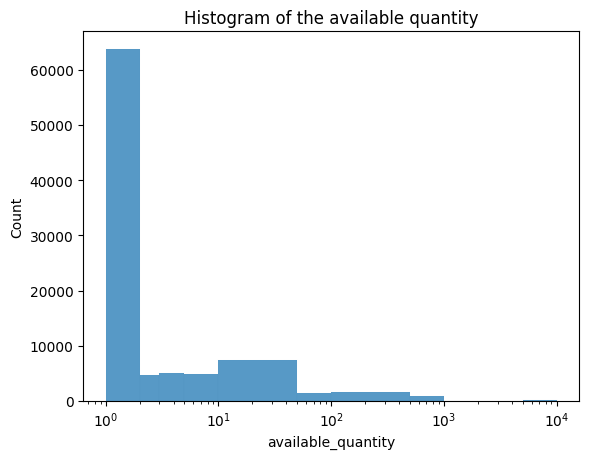

In [8]:
sns.histplot(
    X_dataframe["available_quantity"],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
plt.title("Histogram of the available quantity")
plt.xscale("log")
plt.show()

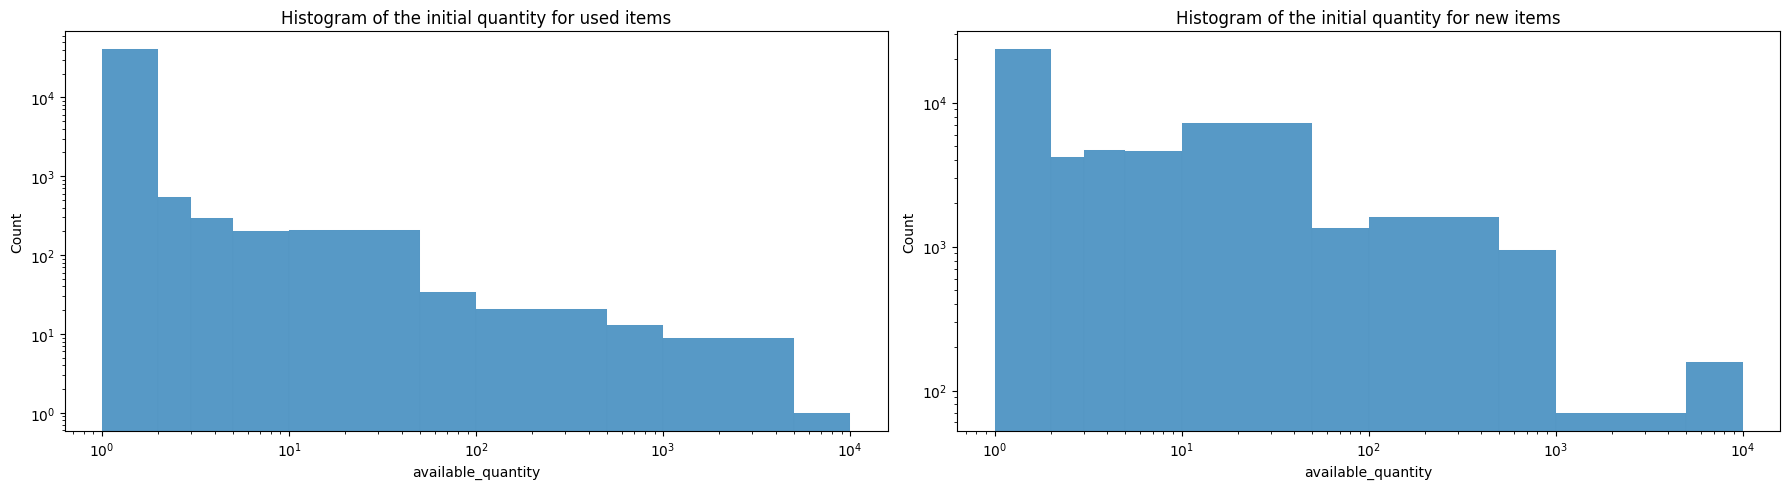

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 1]["available_quantity"],
    ax=ax[0],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[0].set_title("Histogram of the initial quantity for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 0]["available_quantity"],
    ax=ax[1],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[1].set_title("Histogram of the initial quantity for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
plt.tight_layout()
plt.show()

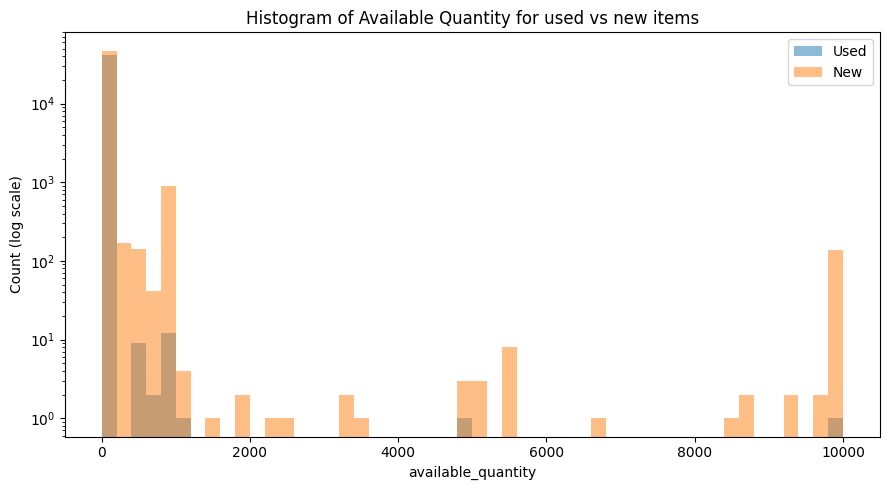

In [10]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 1, "available_quantity"],
    bins=50,
    alpha=0.5,  # transparency
    label="Used",
    color="tab:blue",
)

# New items
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 0, "available_quantity"],
    bins=50,
    alpha=0.5,
    label="New",
    color="tab:orange",
)

ax.set_yscale("log")
ax.set_title("Histogram of Available Quantity for used vs new items")
ax.set_xlabel("available_quantity")
ax.set_ylabel("Count (log scale)")
ax.legend()

plt.tight_layout()
plt.show()

In [11]:
X_dataframe["new"] = X_dataframe["used"] == 0

pearson_corr = X_dataframe[["new", "available_quantity"]].corr(method="pearson")
spearman_corr = X_dataframe[["new", "available_quantity"]].corr(method="spearman")
kendall_corr = X_dataframe[["new", "available_quantity"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                           new  available_quantity
new                 1.000000            0.071967
available_quantity  0.071967            1.000000
Spearman correlation:                           new  available_quantity
new                 1.000000            0.526895
available_quantity  0.526895            1.000000
Kendall correlation:                           new  available_quantity
new                 1.000000            0.492828
available_quantity  0.492828            1.000000


#### 💡 Insights  
Similar to `initial_quantity`

# Sold Quantity

In [12]:
X_dataframe["sold_quantity"].describe()

count    90000.000000
mean         2.328044
std         33.839328
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6065.000000
Name: sold_quantity, dtype: float64

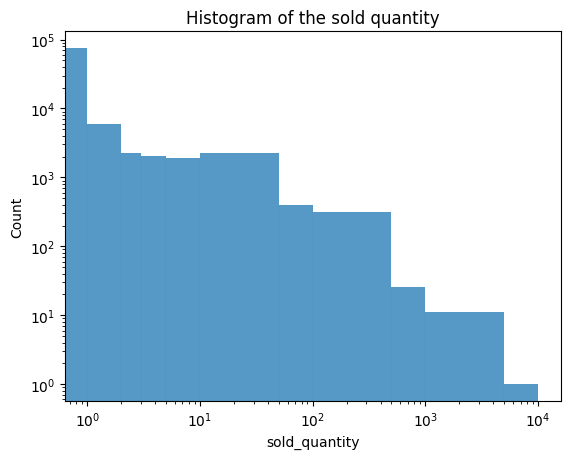

In [13]:
sns.histplot(
    X_dataframe["sold_quantity"],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
plt.title("Histogram of the sold quantity")
plt.xscale("log")
plt.yscale("log")
plt.show()

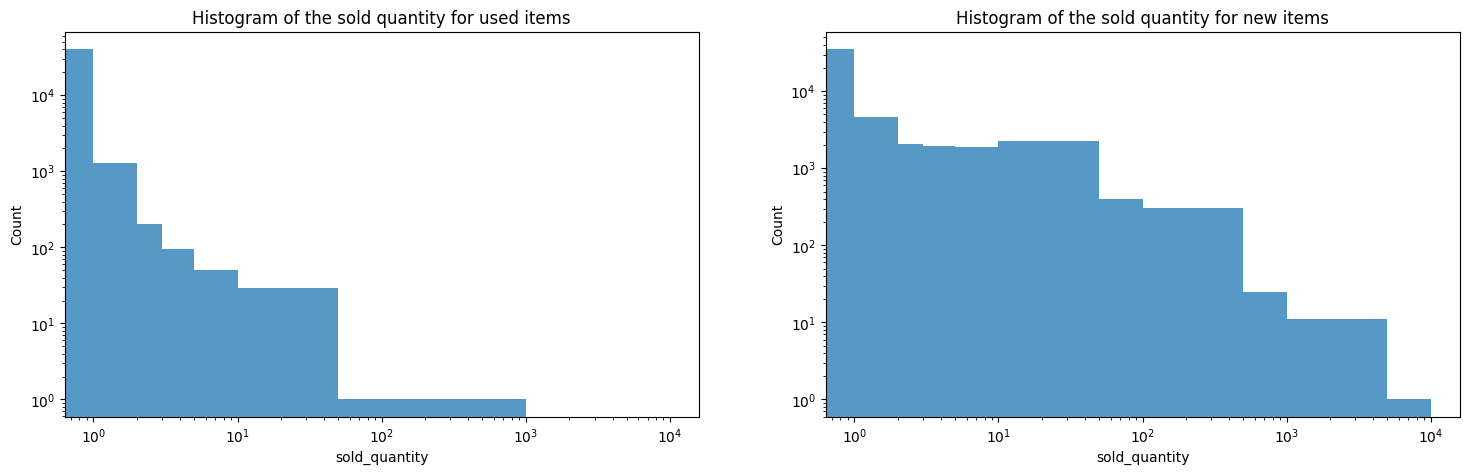

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 1]["sold_quantity"],
    ax=ax[0],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[0].set_title("Histogram of the sold quantity for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 0]["sold_quantity"],
    ax=ax[1],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[1].set_title("Histogram of the sold quantity for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")

plt.show()

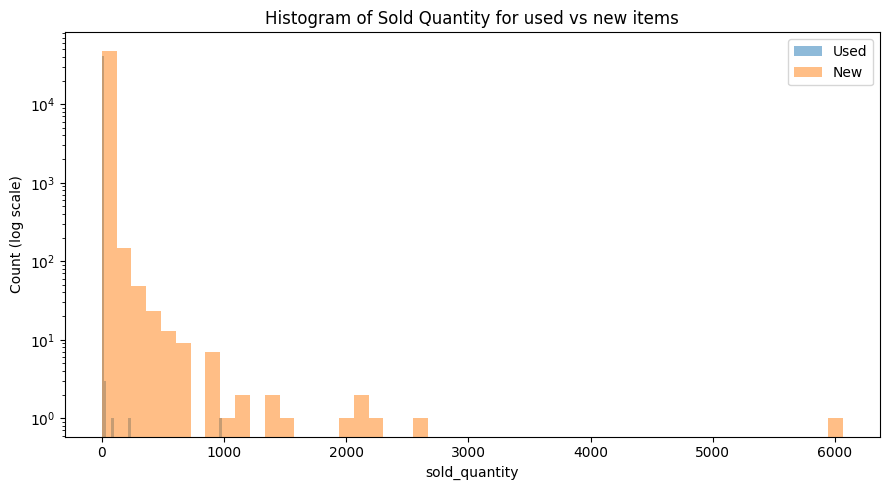

In [15]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 1, "sold_quantity"],
    bins=50,
    alpha=0.5,  # transparency
    label="Used",
    color="tab:blue",
)

# New items
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 0, "sold_quantity"],
    bins=50,
    alpha=0.5,
    label="New",
    color="tab:orange",
)

ax.set_yscale("log")
ax.set_title("Histogram of Sold Quantity for used vs new items")
ax.set_xlabel("sold_quantity")
ax.set_ylabel("Count (log scale)")
ax.legend()

plt.tight_layout()
plt.show()

In [17]:
pearson_corr = X_dataframe[["new", "sold_quantity"]].corr(method="pearson")
spearman_corr = X_dataframe[["new", "sold_quantity"]].corr(method="spearman")
kendall_corr = X_dataframe[["new", "sold_quantity"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                      new  sold_quantity
new            1.000000       0.061176
sold_quantity  0.061176       1.000000
Spearman correlation:                      new  sold_quantity
new            1.000000       0.323669
sold_quantity  0.323669       1.000000
Kendall correlation:                      new  sold_quantity
new            1.000000       0.312783
sold_quantity  0.312783       1.000000


#### 💡 Insights  
Correlation analysis between `sold_quantity` and item condition shows:  
- **Pearson**: very weak linear relationship (0.06).  
- **Spearman**: weak-to-moderate monotonic relationship (0.32).  
- **Kendall**: weak-to-moderate monotonic relationship (0.31).  

This suggests that while there is little linear correlation, there is some monotonic trend:  
**new items tend to have higher sold quantities** than used ones, although the signal is weaker than for `initial_quantity`.